Iteración | x_n      | Error absoluto | Error relativo | Error cuadrático
-----------------------------------------------------------------------
        1 | 0.877583 | 3.775826e-01 | 4.302530e-01 | 1.425686e-01
        2 | 0.639012 | 2.385701e-01 | 3.733418e-01 | 5.691568e-02
        3 | 0.802685 | 1.636726e-01 | 2.039064e-01 | 2.678872e-02
        4 | 0.694778 | 1.079071e-01 | 1.553116e-01 | 1.164394e-02
        5 | 0.768196 | 7.341780e-02 | 9.557173e-02 | 5.390174e-03
        6 | 0.719165 | 4.903039e-02 | 6.817678e-02 | 2.403979e-03
        7 | 0.752356 | 3.319031e-02 | 4.411518e-02 | 1.101597e-03
        8 | 0.730081 | 2.227470e-02 | 3.050989e-02 | 4.961621e-04
        9 | 0.745120 | 1.503928e-02 | 2.018369e-02 | 2.261799e-04
       10 | 0.735006 | 1.011403e-02 | 1.376047e-02 | 1.022937e-04
       11 | 0.741827 | 6.820214e-03 | 9.193812e-03 | 4.651531e-05
       12 | 0.737236 | 4.590797e-03 | 6.227041e-03 | 2.107542e-05
       13 | 0.740330 | 3.093926e-03 | 4.179120e-03 | 9.572381e

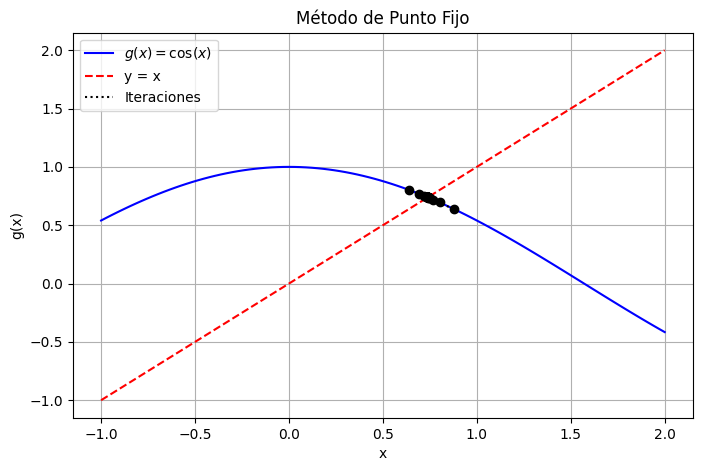

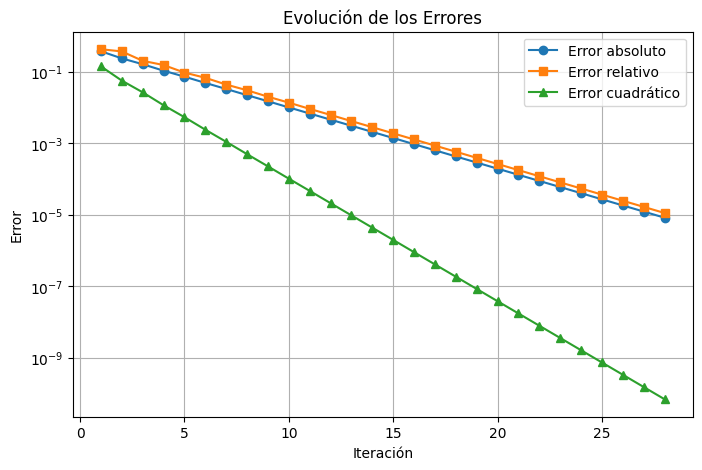

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función g(x) para el método de punto fijo
def g(x):
    return np.cos(x)  # Transformación de la ecuación cos(x) - x = 0 en x = g(x)

# Criterio de convergencia: g'(x) debe cumplir |g'(x)| < 1 para asegurar convergencia
def g_prime(x):
    return -np.sin(x)  # Derivada de g(x) = cos(x)

# Función para calcular el error absoluto
def error_absoluto(x_new, x_old):
    return abs(x_new - x_old)

# Función para calcular el error relativo
def error_relativo(x_new, x_old):
    return abs((x_new - x_old) / x_new)

# Función para calcular el error cuadrático
def error_cuadratico(x_new, x_old):
    return (x_new - x_old) ** 2

# Implementación del método de punto fijo
def punto_fijo(x0, tol=1e-5, max_iter=100):
    iteraciones = []  # Lista para almacenar los resultados de cada iteración
    errores_abs = []   # Lista para el error absoluto
    errores_rel = []   # Lista para el error relativo
    errores_cuad = []  # Lista para el error cuadrático

    x_old = x0  # Valor inicial dado por el usuario

    for i in range(max_iter):  # Ciclo de iteraciones hasta alcanzar la tolerancia o el máximo de iteraciones
        x_new = g(x_old)  # Aplicar la función g(x)

        # Calcular los errores
        e_abs = error_absoluto(x_new, x_old)
        e_rel = error_relativo(x_new, x_old)
        e_cuad = error_cuadratico(x_new, x_old)

        # Guardar los resultados de la iteración
        iteraciones.append((i+1, x_new, e_abs, e_rel, e_cuad))
        errores_abs.append(e_abs)
        errores_rel.append(e_rel)
        errores_cuad.append(e_cuad)

        # Criterio de parada: si el error absoluto es menor que la tolerancia, detener
        if e_abs < tol:
            break

        x_old = x_new  # Actualizar el valor de x para la siguiente iteración

    return iteraciones, errores_abs, errores_rel, errores_cuad

# Parámetro inicial para el método de punto fijo
x0 = 0.5  # Puedes cambiar este valor según lo que creas conveniente

# Ejecutar el método y almacenar resultados
iteraciones, errores_abs, errores_rel, errores_cuad = punto_fijo(x0)

# Imprimir la tabla de iteraciones con los errores correspondientes
print("Iteración | x_n      | Error absoluto | Error relativo | Error cuadrático")
print("-----------------------------------------------------------------------")
for it in iteraciones:
    print(f"{it[0]:9d} | {it[1]:.6f} | {it[2]:.6e} | {it[3]:.6e} | {it[4]:.6e}")

# Graficar la función g(x) junto con la línea y = x para visualizar la convergencia
x_vals = np.linspace(-1, 2, 100)  # Rango de valores de x
y_vals = g(x_vals)  # Evaluación de g(x) en el rango dado

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=r"$g(x) = \cos(x)$", color="blue")  # Gráfica de g(x)
plt.plot(x_vals, x_vals, linestyle="dashed", color="red", label="y = x")  # Línea y = x

# Graficar los puntos de iteraciones
x_points = [it[1] for it in iteraciones]
y_points = [g(x) for x in x_points]
plt.scatter(x_points, y_points, color="black", zorder=3)
plt.plot(x_points, y_points, linestyle="dotted", color="black", label="Iteraciones")

# Configuración de la gráfica
plt.xlabel("x")
plt.ylabel("g(x)")
plt.legend()
plt.grid(True)
plt.title("Método de Punto Fijo")
plt.savefig("punto_fijo_convergencia_cos.png")  # Guardar la imagen de la gráfica
plt.show()

# Graficar la evolución de los errores en escala logarítmica
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(errores_abs) + 1), errores_abs, marker="o", label="Error absoluto")
plt.plot(range(1, len(errores_rel) + 1), errores_rel, marker="s", label="Error relativo")
plt.plot(range(1, len(errores_cuad) + 1), errores_cuad, marker="^", label="Error cuadrático")

# Configuración de la gráfica de errores
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.yscale("log")  # Escala logarítmica para visualizar mejor la convergencia
plt.legend()
plt.grid(True)
plt.title("Evolución de los Errores")
plt.savefig("errores_punto_fijo_cos.png")  # Guardar la gráfica de errores
plt.show()
